In [ ]:
!pip install selenium

In [ ]:
# from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

# from selenium.webdriver.common.by import By

# 명시적 대기를 위해
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys
import re

### 위도 경도 데이터(관공서)

### geojson 사용

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/세종특별자치시_공공기관현황_20201105.csv',encoding='cp949')
data

,구분,도로명주소,지번주소,위도,경도,전화번호,홈페이지
0,세종특별자치시청,세종특별자치시 한누리대로 2130,세종특별자치시 보람동 663,36.480058,127.289039,044-300-3114,http://www.sejong.go.kr/
1,세종특별자치시의회,세종특별자치시 한누리대로 2120,세종특별자치시 보람동 625-6,36.480021,127.290451,044-300-7000,http://council.sejong.go.kr/index.do
2,보건소,세종특별자치시 조치원읍 건강길 16,세종특별자치시 조치원읍 교리 129-1,36.605676,127.296515,044-301-2000,http://www.sejong.go.kr/health.do
3,농업기술센터,세종특별자치시 연서면 월하천로 289,세종특별자치시 연서면 쌍전리 16,36.572999,127.283188,044-301-2500,http://www.sejong.go.kr/adtc.do
4,시설관리사업소,세종특별자치시 전동면 심동로 354,세종특별자치시 전동면 심중리 82,36.670859,127.300290,044-301-3500,http://www.sejong.go.kr/facility.do
5,조치원읍사무소,세종특별자치시 조치원읍 새내16길 17,세종특별자치시 조치원읍 교리 9-1,36.604548,127.298460,044-301-5000,http://www.sejong.go.kr/dong.do
6,연기면사무소,세종특별자치시 연기면 당산로 81,세종특별자치시 연기면 한별리 317-34,36.541827,127.273531,044-301-5200,http://www.sejong.go.kr/dong.do
7,연동면사무소,세종특별자치시 연동면 내송길 20,세종특별자치시 연동면 내판리 9-2,36.559210,127.326691,044-301-5300,http://www.sejong.go.kr/dong.do
8,부강면사무소,세종특별자치시 부강면 부강5길 38,세종특별자치시 부강면 부강리 138,36.529426,127.370753,044-301-5400,http://www.sejong.go.kr/dong.do
9,금남면사무소,세종특별자치시 금남면 용포로 57,세종특별자치시 금남면 용포리 122-1,36.463737,127.280287,044-301-5500,http://www.sejong.go.kr/dong.do


In [ ]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = '/content/drive/MyDrive/Colab Notebooks/세종시/data/32.세종시_행정경계(읍면동).geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))

### 지도에 세종시 관공서 표기

In [ ]:
map = folium.Map(location=[36.48034754623957, 127.28877552600666], zoom_start=11, tiles='Stamen Terrain')

for i in range(len(data)):
    marker = folium.Marker([data.loc[i]['위도'],data.loc[i]['경도']], popup = data.loc[i]['구분'], icon=folium.Icon(color='blue'))
    marker.add_to(map)    

map

In [ ]:
# 30.세종시_법정경계(시군구).geojson
# 31.세종시_법정경계(읍면동).geojson
# 32.세종시_행정경계(읍면동).geojson
# 33.세종시_지적도.geojson
geo = json.load(open('', encoding = 'utf-8'))

### 데이터셋 기본 정보 확인
----------------csv
>
1.세종시_전유부
- 전체 4만건의 데이터
- 건물명, 특수지명, 블록, 로트, 동명칭에 null 포함
- 순번 : 분석에 필요없음
- 시군구코드는 한 값만 존재 -> 분석에 필요없음
- 법정동코드 : [10100, 10200, 10300, 10400, 10600, 10700]
- 대지구분코드 : [1, 3]
- 층구분코드명 : ['지상', '지하']

2.세종시_표제부
- 전체 36729건의 데이터
- 건물명, 동명칭, 구조코드명, 주용도코드명, 사용승인일
- Unnamed: 15    [      nan, 20130823.] >>> 사용 승인일이 잘못 입력된 것으로 추정
- 대장구분코드명 : ['일반', '집합']
- 시군구코드는 한 값만 존재 -> 분석에 필요없음
- 대지구분코드 : [1, 3, 2]
- 세대수(세대), 연면적 :  object -> float 필요

3.세종시_아파트(매매)_실거래가
- 전체 23597 건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 해제사유발생일만 null값 포함

4.세종시_연립다세대(매매)_실거래가
- 621건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 해제사유발생일만 null값 포함

5.세종시_단독다가구(매매)_실거래가
- 1144건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 건축년도, 해제사유발생일에 null값 포함

6.세종시_오피스텔(매매)_실거래가
- 345건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 해제사유발생일만 null값 포함

7.세종시_아파트(전월세)_실거래가
- 38895건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- null값 없음

8.세종시_연립다세대(전월세)_실거래가
- 423건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- null값 없음

9.세종시_단독다가구(전월세)_실거래가
- 4605건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 건축년도에 null값 포함

10.세종시_오피스텔(전월세)_실거래가
- 1274건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음

11.세종시_상업업무용(매매)_실거래가
- 1205건의 데이터
- 층, 건축년도, 해제사유발생일에 null값 포함
- 유형 : ['집합', '일반']
- 지분구분 : [' '] >>> 전체 데이터 null

12.세종시_토지(매매)_실거래가
- 35677건의 데이터
- 용도지역, 해제사유발생일에 null값 포함
- 지분구분 : ['지분', ' ']

13.세종시_분양권_실거래가
- 1478건의 데이터
- Unnamed: 0 >>> 순번 : 분석에 필요없음
- 해제사유발생일만 null값 포함

14.세종시_상권정보
- 10773건의 데이터
- null값 없음

15.세종시_상권정보_업종코드
- 837건의 데이터
- null값 없음
- 대분류코드 : ['Q', 'F', 'D', 'N', 'P', 'R', 'O', 'L']
- 대분류명 : ['음식', '생활서비스', '소매', '관광/여가/오락', '스포츠', '학문/교육', '숙박', '부동산']

18.세종시_공시지가(2017~2020)
- 725439건의 데이터
- null값 없음
- 특수지구분코드 : [1, 2]
- 특수지구분명 : ['일반', '산']
- 표준지 : 대상 토지를 평가할 때, 평가의 기준으로 삼는 필지를 표준지라 한다.

20.세종시_전입자수
- 108082건의 데이터
- null값 없음

21.세종시_전출자수
- 80992건의 데이터
- null값 없음

22.세종시_연령별_인구현황
- 1249 columns(날짜별,성별, 연령별), 21 rows(읍면동)
- 201701_남자(총_거주자_수) = 201701_남자(연령구간인구수) ??
- 맙소사 월별로 다 있네...201701~202012, 남, 녀
- 월별로 성별로 총 거주자 수로 데이터 셋 재구성 필요, 72개의 col로 축소 or 월별로만 구분하여 36개 col 사용

25.세종시_가구_월평균_소비지출액
- 여러 조건별 소비지출액 (50미만 ~ 600이상)
- null값 없음

26.세종시_거주기간
- null값 없음

27.세종시_월평균_가구소득
- null값 없음
- 100미만 ~ 700이상

28.세종시_지역별_세대원수별_세대수
- null값 없음

29.세종시_거주의사(향후)
- null값 없음

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/22.세종시_연령별_인구현황.csv')
df.info()
# df['세종전입행정동'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 1249 entries, 읍면동 to 202012_여자(100세_이상)
dtypes: int64(1248), object(1)
memory usage: 205.0+ KB


In [ ]:
df

,읍면동,201701_남자(총_거주자_수),201701_남자(연령구간인구수),201701_남자(0~9세),201701_남자(10~19세),201701_남자(20~29세),201701_남자(30~39세),201701_남자(40~49세),201701_남자(50~59세),201701_남자(60~69세),201701_남자(70~79세),201701_남자(80~89세),201701_남자(90~99세),201701_남자(100세_이상),201701_여자(총_거주자_수),201701_여자(연령구간인구수),201701_여자(0~9세),201701_여자(10~19세),201701_여자(20~29세),201701_여자(30~39세),201701_여자(40~49세),201701_여자(50~59세),201701_여자(60~69세),201701_여자(70~79세),201701_여자(80~89세),201701_여자(90~99세),201701_여자(100세_이상),201702_남자(총_거주자_수),201702_남자(연령구간인구수),201702_남자(0~9세),201702_남자(10~19세),201702_남자(20~29세),201702_남자(30~39세),201702_남자(40~49세),201702_남자(50~59세),201702_남자(60~69세),201702_남자(70~79세),201702_남자(80~89세),201702_남자(90~99세),201702_남자(100세_이상),...,202011_남자(100세_이상),202011_여자(총_거주자_수),202011_여자(연령구간인구수),202011_여자(0~9세),202011_여자(10~19세),202011_여자(20~29세),202011_여자(30~39세),202011_여자(40~49세),202011_여자(50~59세),202011_여자(60~69세),202011_여자(70~79세),202011_여자(80~89세),202011_여자(90~99세),202011_여자(100세_이상),202012_남자(총_거주자_수),202012_남자(연령구간인구수),202012_남자(0~9세),202012_남자(10~19세),202012_남자(20~29세),202012_남자(30~39세),202012_남자(40~49세),202012_남자(50~59세),202012_남자(60~69세),202012_남자(70~79세),202012_남자(80~89세),202012_남자(90~99세),202012_남자(100세_이상),202012_여자(총_거주자_수),202012_여자(연령구간인구수),202012_여자(0~9세),202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
0,세종특별자치시,121937,121937,17864,13917,13463,22372,23665,15288,8922,4631,1683,132,0,121988,121988,17255,13513,13188,23558,20821,14115,9251,6161,3555,545,26,123257,123257,18115,14197,13461,22535,23999,15438,8994,4693,1694,131,0,...,4,176541,176541,23024,21093,18172,31294,33272,21465,14957,7685,4660,896,23,176998,176998,24183,21417,19020,29931,35054,23347,14845,6562,2384,252,3,177707,177707,23090,21252,18385,31411,33519,21592,15113,7736,4672,915,22
1,조치원읍,23529,23529,2525,2473,3461,3783,4126,3393,2131,1214,389,34,0,22496,22496,2386,2378,2950,3356,3550,3188,2227,1573,763,118,7,23526,23526,2506,2493,3462,3766,4112,3391,2143,1226,392,35,0,...,1,20649,20649,1564,2057,2785,2433,3196,3128,2666,1718,936,159,7,22136,22136,1667,2128,3617,2970,3643,3508,2626,1351,563,62,1,20653,20653,1560,2050,2811,2436,3186,3110,2676,1725,930,162,7
2,연기면,1463,1463,56,93,220,176,263,296,203,112,38,6,0,1217,1217,61,75,148,127,137,226,174,151,107,11,0,1463,1463,58,90,218,177,268,289,205,113,39,6,0,...,0,1151,1151,44,55,151,105,101,213,215,140,103,23,1,1512,1512,40,53,220,230,208,318,275,118,50,0,0,1159,1159,41,54,156,104,109,210,221,138,102,23,1
3,연동면,1828,1828,87,123,210,228,247,368,318,156,87,4,0,1751,1751,102,85,187,162,178,281,273,239,209,34,1,1817,1817,85,117,202,233,244,369,317,159,87,4,0,...,0,1492,1492,45,64,113,116,124,245,308,223,212,42,0,1628,1628,43,65,190,159,201,300,372,189,97,12,0,1495,1495,48,63,112,116,123,245,307,224,212,45,0
4,부강면,3554,3554,235,287,472,505,588,650,396,290,124,7,0,3150,3150,235,253,341,325,418,540,440,378,197,22,1,3555,3555,238,288,467,504,583,655,393,294,126,7,0,...,0,2755,2755,163,170,246,263,315,456,509,351,250,31,1,3412,3412,169,208,486,448,506,643,527,265,145,15,0,2784,2784,166,170,255,274,314,457,511,353,251,32,1
5,금남면,5033,5033,263,287,616,620,767,1013,814,454,181,18,0,4606,4606,240,272,480,478,514,814,742,599,402,62,3,5039,5039,268,289,604,626,770,1021,813,453,177,18,0,...,1,4173,4173,169,204,367,341,385,717,846,613,441,88,2,4616,4616,151,199,515,527,618,892,914,551,224,24,1,4174,4174,171,206,369,354,387,715,836,606,437,91,2
6,장군면,3427,3427,132,199,540,510,574,648,451,258,111,4,0,2819,2819,146,177,415,268,325,556,403,321,184,22,2,3451,3451,133,200,542,529,582,641,453,257,110,4,0,...,0,2856,2856,103,140,381,276,301,555,510,309,243,37,1,3785,3785,112,153,625,569,594,700,601,286,134,11,0,2836,2836,100,144,371,272,294,556,514,302,244,38,1
7,연서면,4182,4182,222,328,532,526,616,770,637,372,172,7,0,3721,3721,238,239,373,383,416,658,554,528,277,53,2,4211,4211,232,324,531,538,620,767,640,377,174,8,0,...,0,3385,3385,165

*파이참 등에서 검색기능에 문자열 교체기능 사용

### 고령자 데이터 합치기

In [ ]:
# 세종특별자치시의 읍면동 데이터는 제외함.
df = df[:1]
df

,읍면동,201701_남자(총_거주자_수),201701_남자(연령구간인구수),201701_남자(0~9세),201701_남자(10~19세),201701_남자(20~29세),201701_남자(30~39세),201701_남자(40~49세),201701_남자(50~59세),201701_남자(60~69세),201701_남자(70~79세),201701_남자(80~89세),201701_남자(90~99세),201701_남자(100세_이상),201701_여자(총_거주자_수),201701_여자(연령구간인구수),201701_여자(0~9세),201701_여자(10~19세),201701_여자(20~29세),201701_여자(30~39세),201701_여자(40~49세),201701_여자(50~59세),201701_여자(60~69세),201701_여자(70~79세),201701_여자(80~89세),201701_여자(90~99세),201701_여자(100세_이상),201702_남자(총_거주자_수),201702_남자(연령구간인구수),201702_남자(0~9세),201702_남자(10~19세),201702_남자(20~29세),201702_남자(30~39세),201702_남자(40~49세),201702_남자(50~59세),201702_남자(60~69세),201702_남자(70~79세),201702_남자(80~89세),201702_남자(90~99세),201702_남자(100세_이상),...,202011_남자(100세_이상),202011_여자(총_거주자_수),202011_여자(연령구간인구수),202011_여자(0~9세),202011_여자(10~19세),202011_여자(20~29세),202011_여자(30~39세),202011_여자(40~49세),202011_여자(50~59세),202011_여자(60~69세),202011_여자(70~79세),202011_여자(80~89세),202011_여자(90~99세),202011_여자(100세_이상),202012_남자(총_거주자_수),202012_남자(연령구간인구수),202012_남자(0~9세),202012_남자(10~19세),202012_남자(20~29세),202012_남자(30~39세),202012_남자(40~49세),202012_남자(50~59세),202012_남자(60~69세),202012_남자(70~79세),202012_남자(80~89세),202012_남자(90~99세),202012_남자(100세_이상),202012_여자(총_거주자_수),202012_여자(연령구간인구수),202012_여자(0~9세),202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
0,세종특별자치시,121937,121937,17864,13917,13463,22372,23665,15288,8922,4631,1683,132,0,121988,121988,17255,13513,13188,23558,20821,14115,9251,6161,3555,545,26,123257,123257,18115,14197,13461,22535,23999,15438,8994,4693,1694,131,0,...,4,176541,176541,23024,21093,18172,31294,33272,21465,14957,7685,4660,896,23,176998,176998,24183,21417,19020,29931,35054,23347,14845,6562,2384,252,3,177707,177707,23090,21252,18385,31411,33519,21592,15113,7736,4672,915,22


In [ ]:
df['201701남자노인'] = df['201701_남자(60~69세)'] + df['201701_남자(70~79세)'] + df['201701_남자(80~89세)'] + df['201701_남자(90~99세)']
df['201702남자노인'] = df['201702_남자(60~69세)'] + df['201702_남자(70~79세)'] + df['201702_남자(80~89세)'] + df['201702_남자(90~99세)']
df['201703남자노인'] = df['201703_남자(60~69세)'] + df['201703_남자(70~79세)'] + df['201703_남자(80~89세)'] + df['201703_남자(90~99세)']
df['201704남자노인'] = df['201704_남자(60~69세)'] + df['201704_남자(70~79세)'] + df['201704_남자(80~89세)'] + df['201704_남자(90~99세)']
df['201705남자노인'] = df['201705_남자(60~69세)'] + df['201705_남자(70~79세)'] + df['201705_남자(80~89세)'] + df['201705_남자(90~99세)']
df['201706남자노인'] = df['201706_남자(60~69세)'] + df['201706_남자(70~79세)'] + df['201706_남자(80~89세)'] + df['201706_남자(90~99세)']
df['201707남자노인'] = df['201707_남자(60~69세)'] + df['201707_남자(70~79세)'] + df['201707_남자(80~89세)'] + df['201707_남자(90~99세)']
df['201708남자노인'] = df['201708_남자(60~69세)'] + df['201708_남자(70~79세)'] + df['201708_남자(80~89세)'] + df['201708_남자(90~99세)']
df['201709남자노인'] = df['201709_남자(60~69세)'] + df['201709_남자(70~79세)'] + df['201709_남자(80~89세)'] + df['201709_남자(90~99세)']
df['201710남자노인'] = df['201710_남자(60~69세)'] + df['201710_남자(70~79세)'] + df['201710_남자(80~89세)'] + df['201710_남자(90~99세)']
df['201711남자노인'] = df['201711_남자(60~69세)'] + df['201711_남자(70~79세)'] + df['201711_남자(80~89세)'] + df['201711_남자(90~99세)']
df['201712남자노인'] = df['201712_남자(60~69세)'] + df['201712_남자(70~79세)'] + df['201712_남자(80~89세)'] + df['201712_남자(90~99세)']


df['201801남자노인'] = df['201801_남자(60~69세)'] + df['201801_남자(70~79세)'] + df['201801_남자(80~89세)'] + df['201801_남자(90~99세)']
df['201802남자노인'] = df['201802_남자(60~69세)'] + df['201802_남자(70~79세)'] + df['201802_남자(80~89세)'] + df['201802_남자(90~99세)']
df['201803남자노인'] = df['201803_남자(60~69세)'] + df['201803_남자(70~79세)'] + df['201803_남자(80~89세)'] + df['201803_남자(90~99세)']
df['201804남자노인'] = df['201804_남자(60~69세)'] + df['201804_남자(70~79세)'] + df['201804_남자(80~89세)'] + df['201804_남자(90~99세)']
df['201805남자노인'] = df['201805_남자(60~69세)'] + df['201805_남자(70~79세)'] + df['201805_남자(80~89세)'] + df['201805_남자(90~99세)']
df['201806남자노인'] = df['201806_남자(60~69세)'] + df['201806_남자(70~79세)'] + df['201806_남자(80~89세)'] + df['201806_남자(90~99세)']
df['201807남자노인'] = df['201807_남자(60~69세)'] + df['201807_남자(70~79세)'] + df['201807_남자(80~89세)'] + df['201807_남자(90~99세)']
df['201808남자노인'] = df['201808_남자(60~69세)'] + df['201808_남자(70~79세)'] + df['201808_남자(80~89세)'] + df['201808_남자(90~99세)']
df['201809남자노인'] = df['201809_남자(60~69세)'] + df['201809_남자(70~79세)'] + df['201809_남자(80~89세)'] + df['201809_남자(90~99세)']
df['201810남자노인'] = df['201810_남자(60~69세)'] + df['201810_남자(70~79세)'] + df['201810_남자(80~89세)'] + df['201810_남자(90~99세)']
df['201811남자노인'] = df['201811_남자(60~69세)'] + df['201811_남자(70~79세)'] + df['201811_남자(80~89세)'] + df['201811_남자(90~99세)']
df['201812남자노인'] = df['201812_남자(60~69세)'] + df['201812_남자(70~79세)'] + df['201812_남자(80~89세)'] + df['201812_남자(90~99세)']


df['201901남자노인'] = df['201901_남자(60~69세)'] + df['201901_남자(70~79세)'] + df['201901_남자(80~89세)'] + df['201901_남자(90~99세)']
df['201902남자노인'] = df['201902_남자(60~69세)'] + df['201902_남자(70~79세)'] + df['201902_남자(80~89세)'] + df['201902_남자(90~99세)']
df['201903남자노인'] = df['201903_남자(60~69세)'] + df['201903_남자(70~79세)'] + df['201903_남자(80~89세)'] + df['201903_남자(90~99세)']
df['201904남자노인'] = df['201904_남자(60~69세)'] + df['201904_남자(70~79세)'] + df['201904_남자(80~89세)'] + df['201904_남자(90~99세)']
df['201905남자노인'] = df['201905_남자(60~69세)'] + df['201905_남자(70~79세)'] + df['201905_남자(80~89세)'] + df['201905_남자(90~99세)']
df['201906남자노인'] = df['201906_남자(60~69세)'] + df['201906_남자(70~79세)'] + df['201906_남자(80~89세)'] + df['201906_남자(90~99세)']
df['201907남자노인'] = df['201907_남자(60~69세)'] + df['201907_남자(70~79세)'] + df['201907_남자(80~89세)'] + df['201907_남자(90~99세)']
df['201908남자노인'] = df['201908_남자(60~69세)'] + df['201908_남자(70~79세)'] + df['201908_남자(80~89세)'] + df['201908_남자(90~99세)']
df['201909남자노인'] = df['201909_남자(60~69세)'] + df['201909_남자(70~79세)'] + df['201909_남자(80~89세)'] + df['201909_남자(90~99세)']
df['201910남자노인'] = df['201910_남자(60~69세)'] + df['201910_남자(70~79세)'] + df['201910_남자(80~89세)'] + df['201910_남자(90~99세)']
df['201911남자노인'] = df['201911_남자(60~69세)'] + df['201911_남자(70~79세)'] + df['201911_남자(80~89세)'] + df['201911_남자(90~99세)']
df['201912남자노인'] = df['201912_남자(60~69세)'] + df['201912_남자(70~79세)'] + df['201912_남자(80~89세)'] + df['201912_남자(90~99세)']


df['202001남자노인'] = df['202001_남자(60~69세)'] + df['202001_남자(70~79세)'] + df['202001_남자(80~89세)'] + df['202001_남자(90~99세)']
df['202002남자노인'] = df['202002_남자(60~69세)'] + df['202002_남자(70~79세)'] + df['202002_남자(80~89세)'] + df['202002_남자(90~99세)']
df['202003남자노인'] = df['202003_남자(60~69세)'] + df['202003_남자(70~79세)'] + df['202003_남자(80~89세)'] + df['202003_남자(90~99세)']
df['202004남자노인'] = df['202004_남자(60~69세)'] + df['202004_남자(70~79세)'] + df['202004_남자(80~89세)'] + df['202004_남자(90~99세)']
df['202005남자노인'] = df['202005_남자(60~69세)'] + df['202005_남자(70~79세)'] + df['202005_남자(80~89세)'] + df['202005_남자(90~99세)']
df['202006남자노인'] = df['202006_남자(60~69세)'] + df['202006_남자(70~79세)'] + df['202006_남자(80~89세)'] + df['202006_남자(90~99세)']
df['202007남자노인'] = df['202007_남자(60~69세)'] + df['202007_남자(70~79세)'] + df['202007_남자(80~89세)'] + df['202007_남자(90~99세)']
df['202008남자노인'] = df['202008_남자(60~69세)'] + df['202008_남자(70~79세)'] + df['202008_남자(80~89세)'] + df['202008_남자(90~99세)']
df['202009남자노인'] = df['202009_남자(60~69세)'] + df['202009_남자(70~79세)'] + df['202009_남자(80~89세)'] + df['202009_남자(90~99세)']
df['202010남자노인'] = df['202010_남자(60~69세)'] + df['202010_남자(70~79세)'] + df['202010_남자(80~89세)'] + df['202010_남자(90~99세)']
df['202011남자노인'] = df['202011_남자(60~69세)'] + df['202011_남자(70~79세)'] + df['202011_남자(80~89세)'] + df['202011_남자(90~99세)']
df['202012남자노인'] = df['202012_남자(60~69세)'] + df['202012_남자(70~79세)'] + df['202012_남자(80~89세)'] + df['202012_남자(90~99세)']






df['201701여자노인'] = df['201701_여자(60~69세)'] + df['201701_여자(70~79세)'] + df['201701_여자(80~89세)'] + df['201701_여자(90~99세)']
df['201702여자노인'] = df['201702_여자(60~69세)'] + df['201702_여자(70~79세)'] + df['201702_여자(80~89세)'] + df['201702_여자(90~99세)']
df['201703여자노인'] = df['201703_여자(60~69세)'] + df['201703_여자(70~79세)'] + df['201703_여자(80~89세)'] + df['201703_여자(90~99세)']
df['201704여자노인'] = df['201704_여자(60~69세)'] + df['201704_여자(70~79세)'] + df['201704_여자(80~89세)'] + df['201704_여자(90~99세)']
df['201705여자노인'] = df['201705_여자(60~69세)'] + df['201705_여자(70~79세)'] + df['201705_여자(80~89세)'] + df['201705_여자(90~99세)']
df['201706여자노인'] = df['201706_여자(60~69세)'] + df['201706_여자(70~79세)'] + df['201706_여자(80~89세)'] + df['201706_여자(90~99세)']
df['201707여자노인'] = df['201707_여자(60~69세)'] + df['201707_여자(70~79세)'] + df['201707_여자(80~89세)'] + df['201707_여자(90~99세)']
df['201708여자노인'] = df['201708_여자(60~69세)'] + df['201708_여자(70~79세)'] + df['201708_여자(80~89세)'] + df['201708_여자(90~99세)']
df['201709여자노인'] = df['201709_여자(60~69세)'] + df['201709_여자(70~79세)'] + df['201709_여자(80~89세)'] + df['201709_여자(90~99세)']
df['201710여자노인'] = df['201710_여자(60~69세)'] + df['201710_여자(70~79세)'] + df['201710_여자(80~89세)'] + df['201710_여자(90~99세)']
df['201711여자노인'] = df['201711_여자(60~69세)'] + df['201711_여자(70~79세)'] + df['201711_여자(80~89세)'] + df['201711_여자(90~99세)']
df['201712여자노인'] = df['201712_여자(60~69세)'] + df['201712_여자(70~79세)'] + df['201712_여자(80~89세)'] + df['201712_여자(90~99세)']


df['201801여자노인'] = df['201801_여자(60~69세)'] + df['201801_여자(70~79세)'] + df['201801_여자(80~89세)'] + df['201801_여자(90~99세)']
df['201802여자노인'] = df['201802_여자(60~69세)'] + df['201802_여자(70~79세)'] + df['201802_여자(80~89세)'] + df['201802_여자(90~99세)']
df['201803여자노인'] = df['201803_여자(60~69세)'] + df['201803_여자(70~79세)'] + df['201803_여자(80~89세)'] + df['201803_여자(90~99세)']
df['201804여자노인'] = df['201804_여자(60~69세)'] + df['201804_여자(70~79세)'] + df['201804_여자(80~89세)'] + df['201804_여자(90~99세)']
df['201805여자노인'] = df['201805_여자(60~69세)'] + df['201805_여자(70~79세)'] + df['201805_여자(80~89세)'] + df['201805_여자(90~99세)']
df['201806여자노인'] = df['201806_여자(60~69세)'] + df['201806_여자(70~79세)'] + df['201806_여자(80~89세)'] + df['201806_여자(90~99세)']
df['201807여자노인'] = df['201807_여자(60~69세)'] + df['201807_여자(70~79세)'] + df['201807_여자(80~89세)'] + df['201807_여자(90~99세)']
df['201808여자노인'] = df['201808_여자(60~69세)'] + df['201808_여자(70~79세)'] + df['201808_여자(80~89세)'] + df['201808_여자(90~99세)']
df['201809여자노인'] = df['201809_여자(60~69세)'] + df['201809_여자(70~79세)'] + df['201809_여자(80~89세)'] + df['201809_여자(90~99세)']
df['201810여자노인'] = df['201810_여자(60~69세)'] + df['201810_여자(70~79세)'] + df['201810_여자(80~89세)'] + df['201810_여자(90~99세)']
df['201811여자노인'] = df['201811_여자(60~69세)'] + df['201811_여자(70~79세)'] + df['201811_여자(80~89세)'] + df['201811_여자(90~99세)']
df['201812여자노인'] = df['201812_여자(60~69세)'] + df['201812_여자(70~79세)'] + df['201812_여자(80~89세)'] + df['201812_여자(90~99세)']


df['201901여자노인'] = df['201901_여자(60~69세)'] + df['201901_여자(70~79세)'] + df['201901_여자(80~89세)'] + df['201901_여자(90~99세)']
df['201902여자노인'] = df['201902_여자(60~69세)'] + df['201902_여자(70~79세)'] + df['201902_여자(80~89세)'] + df['201902_여자(90~99세)']
df['201903여자노인'] = df['201903_여자(60~69세)'] + df['201903_여자(70~79세)'] + df['201903_여자(80~89세)'] + df['201903_여자(90~99세)']
df['201904여자노인'] = df['201904_여자(60~69세)'] + df['201904_여자(70~79세)'] + df['201904_여자(80~89세)'] + df['201904_여자(90~99세)']
df['201905여자노인'] = df['201905_여자(60~69세)'] + df['201905_여자(70~79세)'] + df['201905_여자(80~89세)'] + df['201905_여자(90~99세)']
df['201906여자노인'] = df['201906_여자(60~69세)'] + df['201906_여자(70~79세)'] + df['201906_여자(80~89세)'] + df['201906_여자(90~99세)']
df['201907여자노인'] = df['201907_여자(60~69세)'] + df['201907_여자(70~79세)'] + df['201907_여자(80~89세)'] + df['201907_여자(90~99세)']
df['201908여자노인'] = df['201908_여자(60~69세)'] + df['201908_여자(70~79세)'] + df['201908_여자(80~89세)'] + df['201908_여자(90~99세)']
df['201909여자노인'] = df['201909_여자(60~69세)'] + df['201909_여자(70~79세)'] + df['201909_여자(80~89세)'] + df['201909_여자(90~99세)']
df['201910여자노인'] = df['201910_여자(60~69세)'] + df['201910_여자(70~79세)'] + df['201910_여자(80~89세)'] + df['201910_여자(90~99세)']
df['201911여자노인'] = df['201911_여자(60~69세)'] + df['201911_여자(70~79세)'] + df['201911_여자(80~89세)'] + df['201911_여자(90~99세)']
df['201912여자노인'] = df['201912_여자(60~69세)'] + df['201912_여자(70~79세)'] + df['201912_여자(80~89세)'] + df['201912_여자(90~99세)']


df['202001여자노인'] = df['202001_여자(60~69세)'] + df['202001_여자(70~79세)'] + df['202001_여자(80~89세)'] + df['202001_여자(90~99세)']
df['202002여자노인'] = df['202002_여자(60~69세)'] + df['202002_여자(70~79세)'] + df['202002_여자(80~89세)'] + df['202002_여자(90~99세)']
df['202003여자노인'] = df['202003_여자(60~69세)'] + df['202003_여자(70~79세)'] + df['202003_여자(80~89세)'] + df['202003_여자(90~99세)']
df['202004여자노인'] = df['202004_여자(60~69세)'] + df['202004_여자(70~79세)'] + df['202004_여자(80~89세)'] + df['202004_여자(90~99세)']
df['202005여자노인'] = df['202005_여자(60~69세)'] + df['202005_여자(70~79세)'] + df['202005_여자(80~89세)'] + df['202005_여자(90~99세)']
df['202006여자노인'] = df['202006_여자(60~69세)'] + df['202006_여자(70~79세)'] + df['202006_여자(80~89세)'] + df['202006_여자(90~99세)']
df['202007여자노인'] = df['202007_여자(60~69세)'] + df['202007_여자(70~79세)'] + df['202007_여자(80~89세)'] + df['202007_여자(90~99세)']
df['202008여자노인'] = df['202008_여자(60~69세)'] + df['202008_여자(70~79세)'] + df['202008_여자(80~89세)'] + df['202008_여자(90~99세)']
df['202009여자노인'] = df['202009_여자(60~69세)'] + df['202009_여자(70~79세)'] + df['202009_여자(80~89세)'] + df['202009_여자(90~99세)']
df['202010여자노인'] = df['202010_여자(60~69세)'] + df['202010_여자(70~79세)'] + df['202010_여자(80~89세)'] + df['202010_여자(90~99세)']
df['202011여자노인'] = df['202011_여자(60~69세)'] + df['202011_여자(70~79세)'] + df['202011_여자(80~89세)'] + df['202011_여자(90~99세)']
df['202012여자노인'] = df['202012_여자(60~69세)'] + df['202012_여자(70~79세)'] + df['202012_여자(80~89세)'] + df['202012_여자(90~99세)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df['2017남자노인'] = df['201701남자노인']+df['201702남자노인']+df['201703남자노인']+df['201704남자노인']+df['201705남자노인']+df['201706남자노인']+df['201707남자노인']+df['201708남자노인']+df['201709남자노인']+df['201710남자노인']+df['201711남자노인']+df['201712남자노인']
df['2018남자노인'] = df['201801남자노인']+df['201802남자노인']+df['201803남자노인']+df['201804남자노인']+df['201805남자노인']+df['201806남자노인']+df['201807남자노인']+df['201808남자노인']+df['201809남자노인']+df['201810남자노인']+df['201811남자노인']+df['201812남자노인']
df['2019남자노인'] = df['201901남자노인']+df['201902남자노인']+df['201903남자노인']+df['201904남자노인']+df['201905남자노인']+df['201906남자노인']+df['201907남자노인']+df['201908남자노인']+df['201909남자노인']+df['201910남자노인']+df['201911남자노인']+df['201912남자노인']
df['2020남자노인'] = df['202001남자노인']+df['202002남자노인']+df['202003남자노인']+df['202004남자노인']+df['202005남자노인']+df['202006남자노인']+df['202007남자노인']+df['202008남자노인']+df['202009남자노인']+df['202010남자노인']+df['202011남자노인']+df['202012남자노인']


df['2017여자노인'] = df['201701여자노인']+df['201702여자노인']+df['201703여자노인']+df['201704여자노인']+df['201705여자노인']+df['201706여자노인']+df['201707여자노인']+df['201708여자노인']+df['201709여자노인']+df['201710여자노인']+df['201711여자노인']+df['201712여자노인']
df['2018여자노인'] = df['201801여자노인']+df['201802여자노인']+df['201803여자노인']+df['201804여자노인']+df['201805여자노인']+df['201806여자노인']+df['201807여자노인']+df['201808여자노인']+df['201809여자노인']+df['201810여자노인']+df['201811여자노인']+df['201812여자노인']
df['2019여자노인'] = df['201901여자노인']+df['201902여자노인']+df['201903여자노인']+df['201904여자노인']+df['201905여자노인']+df['201906여자노인']+df['201907여자노인']+df['201908여자노인']+df['201909여자노인']+df['201910여자노인']+df['201911여자노인']+df['201912여자노인']
df['2020여자노인'] = df['202001여자노인']+df['202002여자노인']+df['202003여자노인']+df['202004여자노인']+df['202005여자노인']+df['202006여자노인']+df['202007여자노인']+df['202008여자노인']+df['202009여자노인']+df['202010여자노인']+df['202011여자노인']+df['202012여자노인']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### 20대 남녀 연도별 피쳐생성

In [ ]:
df['2017남20대']=df['201701_남자(20~29세)']+df['201702_남자(20~29세)']+df['201703_남자(20~29세)']+df['201704_남자(20~29세)']+df['201705_남자(20~29세)']+df['201706_남자(20~29세)']+df['201707_남자(20~29세)']+df['201708_남자(20~29세)']+df['201709_남자(20~29세)']+df['201710_남자(20~29세)']+df['201711_남자(20~29세)']+df['201712_남자(20~29세)']
df['2018남20대']=df['201801_남자(20~29세)']+df['201802_남자(20~29세)']+df['201803_남자(20~29세)']+df['201804_남자(20~29세)']+df['201805_남자(20~29세)']+df['201806_남자(20~29세)']+df['201807_남자(20~29세)']+df['201808_남자(20~29세)']+df['201809_남자(20~29세)']+df['201810_남자(20~29세)']+df['201811_남자(20~29세)']+df['201812_남자(20~29세)']
df['2019남20대']=df['201901_남자(20~29세)']+df['201902_남자(20~29세)']+df['201903_남자(20~29세)']+df['201904_남자(20~29세)']+df['201905_남자(20~29세)']+df['201906_남자(20~29세)']+df['201907_남자(20~29세)']+df['201908_남자(20~29세)']+df['201909_남자(20~29세)']+df['201910_남자(20~29세)']+df['201911_남자(20~29세)']+df['201912_남자(20~29세)']
df['2020남20대']=df['202001_남자(20~29세)']+df['202002_남자(20~29세)']+df['202003_남자(20~29세)']+df['202004_남자(20~29세)']+df['202005_남자(20~29세)']+df['202006_남자(20~29세)']+df['202007_남자(20~29세)']+df['202008_남자(20~29세)']+df['202009_남자(20~29세)']+df['202010_남자(20~29세)']+df['202011_남자(20~29세)']+df['202012_남자(20~29세)']



df['2017여20대']=df['201701_여자(20~29세)']+df['201702_여자(20~29세)']+df['201703_여자(20~29세)']+df['201704_여자(20~29세)']+df['201705_여자(20~29세)']+df['201706_여자(20~29세)']+df['201707_여자(20~29세)']+df['201708_여자(20~29세)']+df['201709_여자(20~29세)']+df['201710_여자(20~29세)']+df['201711_여자(20~29세)']+df['201712_여자(20~29세)']
df['2018여20대']=df['201801_여자(20~29세)']+df['201802_여자(20~29세)']+df['201803_여자(20~29세)']+df['201804_여자(20~29세)']+df['201805_여자(20~29세)']+df['201806_여자(20~29세)']+df['201807_여자(20~29세)']+df['201808_여자(20~29세)']+df['201809_여자(20~29세)']+df['201810_여자(20~29세)']+df['201811_여자(20~29세)']+df['201812_여자(20~29세)']
df['2019여20대']=df['201901_여자(20~29세)']+df['201902_여자(20~29세)']+df['201903_여자(20~29세)']+df['201904_여자(20~29세)']+df['201905_여자(20~29세)']+df['201906_여자(20~29세)']+df['201907_여자(20~29세)']+df['201908_여자(20~29세)']+df['201909_여자(20~29세)']+df['201910_여자(20~29세)']+df['201911_여자(20~29세)']+df['201912_여자(20~29세)']
df['2020여20대']=df['202001_여자(20~29세)']+df['202002_여자(20~29세)']+df['202003_여자(20~29세)']+df['202004_여자(20~29세)']+df['202005_여자(20~29세)']+df['202006_여자(20~29세)']+df['202007_여자(20~29세)']+df['202008_여자(20~29세)']+df['202009_여자(20~29세)']+df['202010_여자(20~29세)']+df['202011_여자(20~29세)']+df['202012_여자(20~29세)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### 30대 남녀 연도별 피쳐생성

In [ ]:
df['2017남30대']=df['201701_남자(30~39세)']+df['201702_남자(30~39세)']+df['201703_남자(30~39세)']+df['201704_남자(30~39세)']+df['201705_남자(30~39세)']+df['201706_남자(30~39세)']+df['201707_남자(30~39세)']+df['201708_남자(30~39세)']+df['201709_남자(30~39세)']+df['201710_남자(30~39세)']+df['201711_남자(30~39세)']+df['201712_남자(30~39세)']
df['2018남30대']=df['201801_남자(30~39세)']+df['201802_남자(30~39세)']+df['201803_남자(30~39세)']+df['201804_남자(30~39세)']+df['201805_남자(30~39세)']+df['201806_남자(30~39세)']+df['201807_남자(30~39세)']+df['201808_남자(30~39세)']+df['201809_남자(30~39세)']+df['201810_남자(30~39세)']+df['201811_남자(30~39세)']+df['201812_남자(30~39세)']
df['2019남30대']=df['201901_남자(30~39세)']+df['201902_남자(30~39세)']+df['201903_남자(30~39세)']+df['201904_남자(30~39세)']+df['201905_남자(30~39세)']+df['201906_남자(30~39세)']+df['201907_남자(30~39세)']+df['201908_남자(30~39세)']+df['201909_남자(30~39세)']+df['201910_남자(30~39세)']+df['201911_남자(30~39세)']+df['201912_남자(30~39세)']
df['2020남30대']=df['202001_남자(30~39세)']+df['202002_남자(30~39세)']+df['202003_남자(30~39세)']+df['202004_남자(30~39세)']+df['202005_남자(30~39세)']+df['202006_남자(30~39세)']+df['202007_남자(30~39세)']+df['202008_남자(30~39세)']+df['202009_남자(30~39세)']+df['202010_남자(30~39세)']+df['202011_남자(30~39세)']+df['202012_남자(30~39세)']



df['2017여30대']=df['201701_여자(30~39세)']+df['201702_여자(30~39세)']+df['201703_여자(30~39세)']+df['201704_여자(30~39세)']+df['201705_여자(30~39세)']+df['201706_여자(30~39세)']+df['201707_여자(30~39세)']+df['201708_여자(30~39세)']+df['201709_여자(30~39세)']+df['201710_여자(30~39세)']+df['201711_여자(30~39세)']+df['201712_여자(30~39세)']
df['2018여30대']=df['201801_여자(30~39세)']+df['201802_여자(30~39세)']+df['201803_여자(30~39세)']+df['201804_여자(30~39세)']+df['201805_여자(30~39세)']+df['201806_여자(30~39세)']+df['201807_여자(30~39세)']+df['201808_여자(30~39세)']+df['201809_여자(30~39세)']+df['201810_여자(30~39세)']+df['201811_여자(30~39세)']+df['201812_여자(30~39세)']
df['2019여30대']=df['201901_여자(30~39세)']+df['201902_여자(30~39세)']+df['201903_여자(30~39세)']+df['201904_여자(30~39세)']+df['201905_여자(30~39세)']+df['201906_여자(30~39세)']+df['201907_여자(30~39세)']+df['201908_여자(30~39세)']+df['201909_여자(30~39세)']+df['201910_여자(30~39세)']+df['201911_여자(30~39세)']+df['201912_여자(30~39세)']
df['2020여30대']=df['202001_여자(30~39세)']+df['202002_여자(30~39세)']+df['202003_여자(30~39세)']+df['202004_여자(30~39세)']+df['202005_여자(30~39세)']+df['202006_여자(30~39세)']+df['202007_여자(30~39세)']+df['202008_여자(30~39세)']+df['202009_여자(30~39세)']+df['202010_여자(30~39세)']+df['202011_여자(30~39세)']+df['202012_여자(30~39세)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### 40대 남녀 연도별 피쳐생성

In [ ]:
df['2017남40대']=df['201701_남자(40~49세)']+df['201702_남자(40~49세)']+df['201703_남자(40~49세)']+df['201704_남자(40~49세)']+df['201705_남자(40~49세)']+df['201706_남자(40~49세)']+df['201707_남자(40~49세)']+df['201708_남자(40~49세)']+df['201709_남자(40~49세)']+df['201710_남자(40~49세)']+df['201711_남자(40~49세)']+df['201712_남자(40~49세)']
df['2018남40대']=df['201801_남자(40~49세)']+df['201802_남자(40~49세)']+df['201803_남자(40~49세)']+df['201804_남자(40~49세)']+df['201805_남자(40~49세)']+df['201806_남자(40~49세)']+df['201807_남자(40~49세)']+df['201808_남자(40~49세)']+df['201809_남자(40~49세)']+df['201810_남자(40~49세)']+df['201811_남자(40~49세)']+df['201812_남자(40~49세)']
df['2019남40대']=df['201901_남자(40~49세)']+df['201902_남자(40~49세)']+df['201903_남자(40~49세)']+df['201904_남자(40~49세)']+df['201905_남자(40~49세)']+df['201906_남자(40~49세)']+df['201907_남자(40~49세)']+df['201908_남자(40~49세)']+df['201909_남자(40~49세)']+df['201910_남자(40~49세)']+df['201911_남자(40~49세)']+df['201912_남자(40~49세)']
df['2020남40대']=df['202001_남자(40~49세)']+df['202002_남자(40~49세)']+df['202003_남자(40~49세)']+df['202004_남자(40~49세)']+df['202005_남자(40~49세)']+df['202006_남자(40~49세)']+df['202007_남자(40~49세)']+df['202008_남자(40~49세)']+df['202009_남자(40~49세)']+df['202010_남자(40~49세)']+df['202011_남자(40~49세)']+df['202012_남자(40~49세)']



df['2017여40대']=df['201701_여자(40~49세)']+df['201702_여자(40~49세)']+df['201703_여자(40~49세)']+df['201704_여자(40~49세)']+df['201705_여자(40~49세)']+df['201706_여자(40~49세)']+df['201707_여자(40~49세)']+df['201708_여자(40~49세)']+df['201709_여자(40~49세)']+df['201710_여자(40~49세)']+df['201711_여자(40~49세)']+df['201712_여자(40~49세)']
df['2018여40대']=df['201801_여자(40~49세)']+df['201802_여자(40~49세)']+df['201803_여자(40~49세)']+df['201804_여자(40~49세)']+df['201805_여자(40~49세)']+df['201806_여자(40~49세)']+df['201807_여자(40~49세)']+df['201808_여자(40~49세)']+df['201809_여자(40~49세)']+df['201810_여자(40~49세)']+df['201811_여자(40~49세)']+df['201812_여자(40~49세)']
df['2019여40대']=df['201901_여자(40~49세)']+df['201902_여자(40~49세)']+df['201903_여자(40~49세)']+df['201904_여자(40~49세)']+df['201905_여자(40~49세)']+df['201906_여자(40~49세)']+df['201907_여자(40~49세)']+df['201908_여자(40~49세)']+df['201909_여자(40~49세)']+df['201910_여자(40~49세)']+df['201911_여자(40~49세)']+df['201912_여자(40~49세)']
df['2020여40대']=df['202001_여자(40~49세)']+df['202002_여자(40~49세)']+df['202003_여자(40~49세)']+df['202004_여자(40~49세)']+df['202005_여자(40~49세)']+df['202006_여자(40~49세)']+df['202007_여자(40~49세)']+df['202008_여자(40~49세)']+df['202009_여자(40~49세)']+df['202010_여자(40~49세)']+df['202011_여자(40~49세)']+df['202012_여자(40~49세)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### 50대 남녀 연도별 피쳐생성

In [ ]:
df['2017남50대']=df['201701_남자(50~59세)']+df['201702_남자(50~59세)']+df['201703_남자(50~59세)']+df['201704_남자(50~59세)']+df['201705_남자(50~59세)']+df['201706_남자(50~59세)']+df['201707_남자(50~59세)']+df['201708_남자(50~59세)']+df['201709_남자(50~59세)']+df['201710_남자(50~59세)']+df['201711_남자(50~59세)']+df['201712_남자(50~59세)']
df['2018남50대']=df['201801_남자(50~59세)']+df['201802_남자(50~59세)']+df['201803_남자(50~59세)']+df['201804_남자(50~59세)']+df['201805_남자(50~59세)']+df['201806_남자(50~59세)']+df['201807_남자(50~59세)']+df['201808_남자(50~59세)']+df['201809_남자(50~59세)']+df['201810_남자(50~59세)']+df['201811_남자(50~59세)']+df['201812_남자(50~59세)']
df['2019남50대']=df['201901_남자(50~59세)']+df['201902_남자(50~59세)']+df['201903_남자(50~59세)']+df['201904_남자(50~59세)']+df['201905_남자(50~59세)']+df['201906_남자(50~59세)']+df['201907_남자(50~59세)']+df['201908_남자(50~59세)']+df['201909_남자(50~59세)']+df['201910_남자(50~59세)']+df['201911_남자(50~59세)']+df['201912_남자(50~59세)']
df['2020남50대']=df['202001_남자(50~59세)']+df['202002_남자(50~59세)']+df['202003_남자(50~59세)']+df['202004_남자(50~59세)']+df['202005_남자(50~59세)']+df['202006_남자(50~59세)']+df['202007_남자(50~59세)']+df['202008_남자(50~59세)']+df['202009_남자(50~59세)']+df['202010_남자(50~59세)']+df['202011_남자(50~59세)']+df['202012_남자(50~59세)']



df['2017여50대']=df['201701_여자(50~59세)']+df['201702_여자(50~59세)']+df['201703_여자(50~59세)']+df['201704_여자(50~59세)']+df['201705_여자(50~59세)']+df['201706_여자(50~59세)']+df['201707_여자(50~59세)']+df['201708_여자(50~59세)']+df['201709_여자(50~59세)']+df['201710_여자(50~59세)']+df['201711_여자(50~59세)']+df['201712_여자(50~59세)']
df['2018여50대']=df['201801_여자(50~59세)']+df['201802_여자(50~59세)']+df['201803_여자(50~59세)']+df['201804_여자(50~59세)']+df['201805_여자(50~59세)']+df['201806_여자(50~59세)']+df['201807_여자(50~59세)']+df['201808_여자(50~59세)']+df['201809_여자(50~59세)']+df['201810_여자(50~59세)']+df['201811_여자(50~59세)']+df['201812_여자(50~59세)']
df['2019여50대']=df['201901_여자(50~59세)']+df['201902_여자(50~59세)']+df['201903_여자(50~59세)']+df['201904_여자(50~59세)']+df['201905_여자(50~59세)']+df['201906_여자(50~59세)']+df['201907_여자(50~59세)']+df['201908_여자(50~59세)']+df['201909_여자(50~59세)']+df['201910_여자(50~59세)']+df['201911_여자(50~59세)']+df['201912_여자(50~59세)']
df['2020여50대']=df['202001_여자(50~59세)']+df['202002_여자(50~59세)']+df['202003_여자(50~59세)']+df['202004_여자(50~59세)']+df['202005_여자(50~59세)']+df['202006_여자(50~59세)']+df['202007_여자(50~59세)']+df['202008_여자(50~59세)']+df['202009_여자(50~59세)']+df['202010_여자(50~59세)']+df['202011_여자(50~59세)']+df['202012_여자(50~59세)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### 새로운 데이터프레임 생성 후 csv파일로 저장

In [ ]:
df = df[['2017남20대','2017여20대','2017남30대','2017여30대','2017남40대','2017여40대','2017남50대','2017여50대','2017남자노인','2017여자노인','2018남20대','2018여20대','2018남30대','2018여30대','2018남40대','2018여40대','2018남50대','2018여50대','2018남자노인','2018여자노인','2019남20대','2019여20대','2019남30대','2019여30대','2019남40대','2019여40대','2019남50대','2019여50대','2019남자노인','2019여자노인','2020남20대','2020여20대','2020남30대','2020여30대','2020남40대','2020여40대','2020남50대','2020여50대','2020남자노인','2020여자노인']]

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/new.세종시_연령별_인구현황.csv')

### 실거래가 자료 3~ 10번 자료
- 3.세종시_아파트(매매)_실거래가.csv
- 4.세종시_연립다세대(매매)_실거래가.csv
- 5.세종시_단독다가구(매매)_실거래가.csv
- 6.세종시_오피스텔(매매)_실거래가.csv
- 7.세종시_아파트(전월세)_실거래가.csv
- 8.세종시_연립다세대(전월세)_실거래가.csv
- 9.세종시_단독다가구(전월세)_실거래가.csv
- 10.세종시_오피스텔(전월세)_실거래가.csv
- 13.세종시_분양권_실거래가.csv

금액 , 처리 후 저장

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/3.세종시_아파트(매매)_실거래가.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/4.세종시_연립다세대(매매)_실거래가.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/6.세종시_오피스텔(매매)_실거래가.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/7.세종시_아파트(전월세)_실거래가.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/8.세종시_연립다세대(전월세)_실거래가.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/9.세종시_단독다가구(전월세)_실거래가.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/10.세종시_오피스텔(전월세)_실거래가.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/13.세종시_분양권_실거래가.csv')

In [ ]:
# df1['거래금액(만원)'] = df1['거래금액(만원)'].str.replace(',', '').astype('int64')
# df2['거래금액(만원)'] = df2['거래금액(만원)'].str.replace(',', '').astype('int64')
# df3['거래금액(만원)'] = df3['거래금액(만원)'].str.replace(',', '').astype('int64')
# df4['거래금액(만원)'] = df4['거래금액(만원)'].str.replace(',', '').astype('int64')
# df5['보증금(만원)'] = df5['보증금(만원)'].str.replace(',', '').astype('int64')
# df6['보증금(만원)'] = df6['보증금(만원)'].str.replace(',', '').astype('int64')
# df7['보증금(만원)'] = df7['보증금(만원)'].str.replace(',', '').astype('int64')
# df8['보증금(만원)'] = df8['보증금(만원)'].str.replace(',', '').astype('int64')
# df9['거래금액(만원)'] = df9['거래금액(만원)'].str.replace(',', '').astype('int64')

In [ ]:
#  df1.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/3.세종시_아파트(매매)_실거래가.csv')
#  df2.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/4.세종시_연립다세대(매매)_실거래가.csv')
#  df3.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')
#  df4.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/6.세종시_오피스텔(매매)_실거래가.csv')
#  df5.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/7.세종시_아파트(전월세)_실거래가.csv')
#  df6.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/8.세종시_연립다세대(전월세)_실거래가.csv')
#  df7.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/9.세종시_단독다가구(전월세)_실거래가.csv')
#  df8.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/10.세종시_오피스텔(전월세)_실거래가.csv')
#  df9.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/13.세종시_분양권_실거래가.csv')

### -----------------------------------------------------------------------------

In [ ]:
df2 = df2[['계약년월','전용면적(㎡)','거래금액(만원)']]
df2

,계약년월,전용면적(㎡),거래금액(만원)
0,201701,62.0800,4700
1,201701,64.2300,6500
2,201701,53.9650,4300
3,201701,48.5300,4000
4,201702,67.9000,12800
...,...,...,...
616,202012,21.6349,9500
617,202012,21.6349,9500
618,202012,54.0900,5500
619,202012,64.8200,13400


In [ ]:
index = df2.index
columns = df2.columns

Index(['거래금액(만원)', '전용면적(㎡)', '월별평균거래가'], dtype='object')

In [ ]:
df2 = pd.pivot_table(df2, index = '계약년월',aggfunc = 'sum')
df2

,거래금액(만원),전용면적(㎡)
계약년월,,
201701,19500,228.8050
201702,12800,67.9000
201703,33900,379.3400
201704,46650,375.2900
201705,119500,901.4800
201706,358500,1565.2843
201707,172800,1114.1955
201708,46700,333.5250
201709,170050,1166.1150


In [ ]:
df2['월별평균거래가'] = df2['거래금액(만원)'] / df2['전용면적(㎡)']

In [ ]:
df2

In [ ]:
df2.reindex(index, columns)

,거래금액(만원),전용면적(㎡),월별평균거래가
계약년월,,,
201701,19500,228.8050,85.225410
201702,12800,67.9000,188.512518
201703,33900,379.3400,89.365740
201704,46650,375.2900,124.303872
201705,119500,901.4800,132.559791
201706,358500,1565.2843,229.031876
201707,172800,1114.1955,155.089479
201708,46700,333.5250,140.019489
201709,170050,1166.1150,145.826098


### 세종시_아파트 거주 현황

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/3.세종시_아파트(매매)_실거래가.csv')
df

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,0,201701,1,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.9849,8600,7,2016,NaN
1,1,201701,1,세종특별자치시 종촌동,683,0,가재마을2단지,59.8652,27300,7,2014,NaN
2,2,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000,3,2015,NaN
3,3,201701,2,세종특별자치시 고운동,1706,0,가락마을8단지(고운뜰아파트),84.9800,30500,20,2015,NaN
4,4,201701,2,세종특별자치시 아름동,1284,0,범지기마을7단지 호반에코시티,84.9280,31300,6,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23592,23592,202012,31,세종특별자치시 조치원읍 신흥리,398,0,신흥대우푸르지오,126.6976,50000,10,2006,NaN
23593,23593,202012,31,세종특별자치시 조치원읍 죽림리,396,0,조치원죽림자이,128.9491,44000,2,2008,NaN
23594,23594,202012,31,세종특별자치시 종촌동,656,0,가재마을10단지,84.9365,73500,4,2014,NaN
23595,23595,202012,31,세종특별자치시 종촌동,644,0,가재마을6단지,84.6799,60000,6,2016,NaN


In [ ]:
df['전용면적(㎡)'].min()

12.1799

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/7.세종시_아파트(전월세)_실거래가.csv')
df1

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,0,201701,13,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,10000,0,13,2015
1,1,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,18000,0,19,2015
2,2,201701,14,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,59.8338,17000,0,10,2015
3,3,201701,15,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),전세,84.9895,17000,0,2,2015
4,4,201702,4,세종특별자치시 고운동,1396,0,가락마을 20단지(호반베르디움5차),월세,84.9895,10000,30,13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,202011,21,세종특별자치시 해밀동,6402,1,해밀마을 2단지,월세,102.8300,10000,100,5,2020
38891,38891,202012,8,세종특별자치시 해밀동,6402,1,해밀마을 2단지,월세,102.5300,10000,95,14,2020
38892,38892,202012,11,세종특별자치시 해밀동,6402,1,해밀마을 2단지,전세,84.9500,30000,0,18,2020
38893,38893,202012,12,세종특별자치시 해밀동,6402,1,해밀마을 2단지,전세,84.9500,34000,0,18,2020


In [ ]:
a = sum(df1['전월세구분'] =='전세')
b = sum(df1['전월세구분'] =='월세')
c = len(df)

In [ ]:
df_1 = pd.DataFrame([a,b,c], index=['Lease','Monthly rent','Own'])
df_1

,0
Lease,26935
Monthly rent,11960
Own,23597


In [ ]:
Type_of_residence = np.array(df_1.index)
counts = np.array(df_1[0])

In [ ]:
 !pip3 install plotnine

In [ ]:
import plotnine
from plotnine import *

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


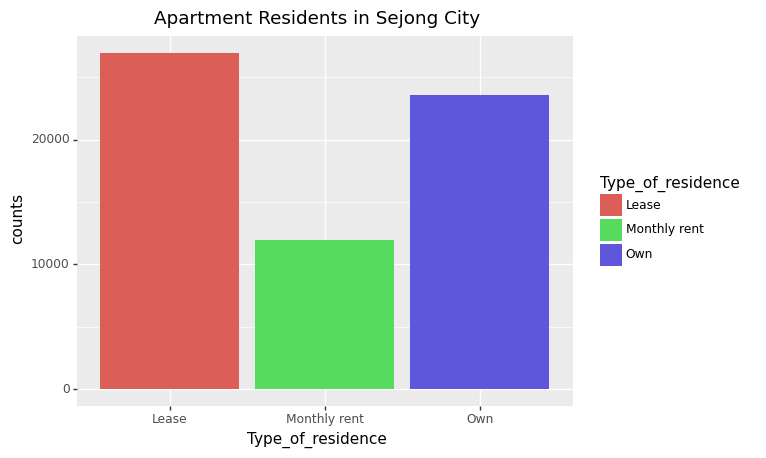

<ggplot: (8780105559081)>

In [ ]:
(ggplot(df_1)
 + geom_col(aes(x='Type_of_residence',y='counts', fill='Type_of_residence'))
 + ggtitle('Apartment Residents in Sejong City')
)

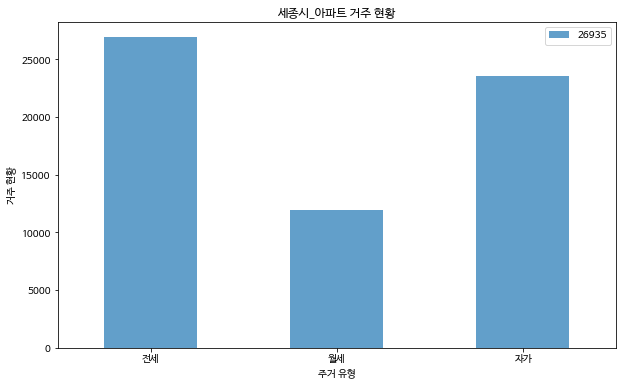

In [ ]:
df_1.plot(kind='bar', figsize=(10,6), stacked=False, alpha=0.7)
plt.title('세종시_아파트 거주 현황')
plt.xlabel('주거 유형')
plt.ylabel('거주 현황')
plt.xticks(rotation = 0 )
plt.legend([a,b,c])

38895

### 세종시_연립다세대 거주 현황

In [ ]:
#  !pip3 install plotnine
import plotnine
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/4.세종시_연립다세대(매매)_실거래가.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/8.세종시_연립다세대(전월세)_실거래가.csv')

In [ ]:
a = sum(df1['전월세구분'] =='전세')
b = sum(df1['전월세구분'] =='월세')
c = len(df)

In [ ]:
df_1 = pd.DataFrame([a,b,c], index=['Lease','Monthly rent','Own'])
df_1

,0
Lease,196
Monthly rent,227
Own,621


In [ ]:
Type_of_residence = np.array(df_1.index)
counts = np.array(df_1[0])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


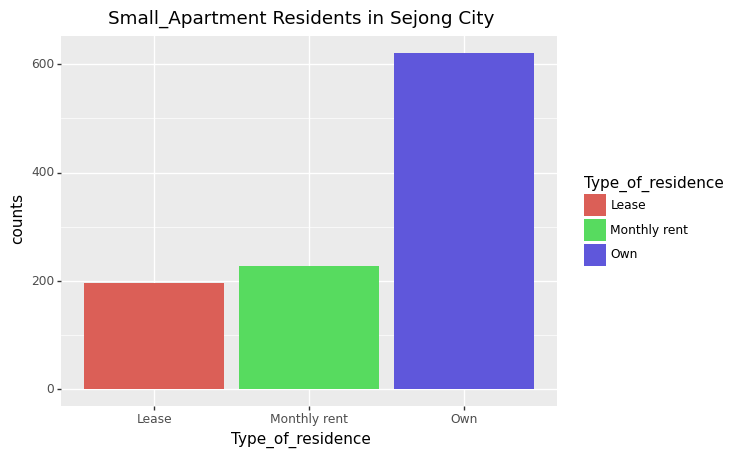

<ggplot: (8780105312645)>

In [ ]:
(ggplot(df_1)
 + geom_col(aes(x='Type_of_residence',y='counts', fill='Type_of_residence'))
 + ggtitle('Small_Apartment Residents in Sejong City')
)

### 세종시_단독다가구 거주 현황

In [ ]:
#  !pip3 install plotnine
import plotnine
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/9.세종시_단독다가구(전월세)_실거래가.csv')

In [ ]:
a = sum(df1['전월세구분'] =='전세')
b = sum(df1['전월세구분'] =='월세')
c = len(df)

In [ ]:
df_1 = pd.DataFrame([a,b,c], index=['Lease','Monthly rent','Own'])
df_1

,0
Lease,3244
Monthly rent,1361
Own,1144


In [ ]:
Type_of_residence = np.array(df_1.index)
counts = np.array(df_1[0])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


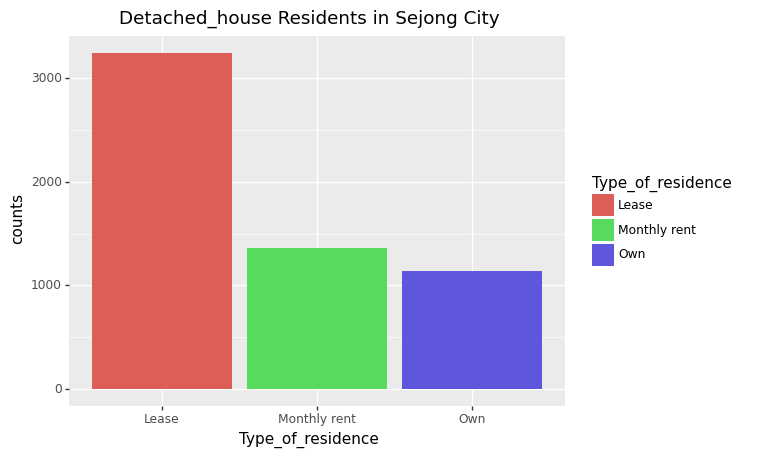

<ggplot: (8780105180325)>

In [ ]:
(ggplot(df_1)
 + geom_col(aes(x='Type_of_residence',y='counts', fill='Type_of_residence'))
 + ggtitle('Detached_house Residents in Sejong City')
)

### 세종시_오피스텔 거주 현황

In [ ]:
#  !pip3 install plotnine
import plotnine
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/6.세종시_오피스텔(매매)_실거래가.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/10.세종시_오피스텔(전월세)_실거래가.csv')

In [ ]:
a = sum(df1['전월세구분'] =='전세')
b = sum(df1['전월세구분'] =='월세')
c = len(df)

In [ ]:
df_1 = pd.DataFrame([a,b,c], index=['Lease','Monthly rent','Own'])
df_1

,0
Lease,577
Monthly rent,697
Own,345


In [ ]:
Type_of_residence = np.array(df_1.index)
counts = np.array(df_1[0])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


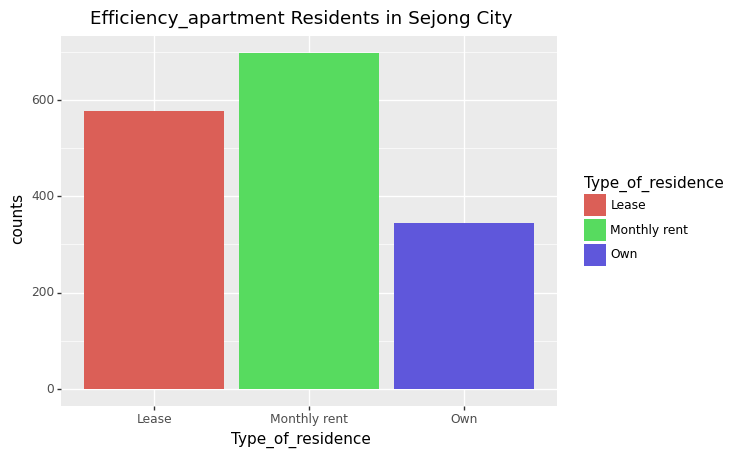

<ggplot: (8780105127877)>

In [ ]:
(ggplot(df_1)
 + geom_col(aes(x='Type_of_residence',y='counts', fill='Type_of_residence'))
 + ggtitle('Efficiency_apartment Residents in Sejong City')
)

### 출생자수(2017~2019)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/시도_합계출산율__모의_연령별_출산율_20210323154931.csv', encoding='cp949')
# df = df.drop([0,1])
df

,시도별,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7
2,서울특별시,0.717,0.5,3.0,17.7,68.2,45.5,7.5,0.2
3,부산광역시,0.827,0.8,5.2,28.8,79.3,42.5,6.6,0.2
4,대구광역시,0.932,0.6,5.7,37.1,91.3,43.0,5.8,0.1
5,인천광역시,0.940,1.0,8.5,36.2,87.0,46.3,7.1,0.2
6,광주광역시,0.913,0.8,7.1,37.3,85.7,42.2,6.6,0.1
7,대전광역시,0.883,0.7,7.0,36.7,82.0,42.0,6.1,0.1
8,울산광역시,1.084,0.9,7.9,48.6,107.0,43.6,6.2,0.2
9,세종특별자치시,1.472,0.7,11.6,73.1,139.8,60.6,9.5,0.4
10,경기도,0.943,0.7,6.7,36.5,89.3,46.2,7.2,0.2
11,강원도,1.082,1.3,11.0,54.7,96.6,43.1,6.7,0.3


In [ ]:
df['시도별']

1       서울특별시
2       부산광역시
3       대구광역시
4       인천광역시
5       광주광역시
6       대전광역시
7       울산광역시
8     세종특별자치시
9         경기도
10        강원도
11       충청북도
12       충청남도
13       전라북도
14       전라남도
15       경상북도
16       경상남도
17    제주특별자치도
Name: 시도별, dtype: object

In [ ]:
idx = list(df['시도별'])
data = list(df['2019'])

In [ ]:
Data = pd.DataFrame(data, index=idx)
Data

,0
서울특별시,0.717
부산광역시,0.827
대구광역시,0.932
인천광역시,0.940
광주광역시,0.913
대전광역시,0.883
울산광역시,1.084
세종특별자치시,1.472
경기도,0.943
강원도,1.082


In [ ]:
Data.rename(columns = {0:'출생자수'}, inplace=True)
Data

,출생자수
서울특별시,0.717
부산광역시,0.827
대구광역시,0.932
인천광역시,0.940
광주광역시,0.913
대전광역시,0.883
울산광역시,1.084
세종특별자치시,1.472
경기도,0.943
강원도,1.082


In [ ]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = '/content/drive/MyDrive/Colab Notebooks/세종시/data/TL_SCCO_CTPRVN.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
df_2

,city,rates
서울특별시,서울특별시,0.717
부산광역시,부산광역시,0.827
대구광역시,대구광역시,0.932
인천광역시,인천광역시,0.940
광주광역시,광주광역시,0.913
대전광역시,대전광역시,0.883
울산광역시,울산광역시,1.084
세종특별자치시,세종특별자치시,1.472
경기도,경기도,0.943
강원도,강원도,1.082


In [ ]:
df_2 = pd.DataFrame({'city':Data.index,'rates':Data['출생자수']})

In [ ]:
df_2 = df_2.astype({'rates':float})

In [ ]:
df_2.dtypes

city      object
rates    float64
dtype: object

In [ ]:
# ({'gu':population.index, 'counts':population['스타벅스']})


map = folium.Map(location=[36.281658, 127.956326], zoom_start=5, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=df_2,
              columns=['city', 'rates'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

map

### 세종시 아파트 전용면적별_매매(2017, 2020)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/3.세종시_아파트(매매)_실거래가.csv')

In [ ]:
# 201701~12  4668건임을 확인
df[df['계약년월'] == 201712]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
3880,3880,201712,1,세종특별자치시 고운동,1705,0,가락마을5단지(유승한내들),59.9058,25100,23,2015,NaN
3881,3881,201712,1,세종특별자치시 금남면 용포리,320,0,두진리버빌,59.8676,19280,11,2000,NaN
3882,3882,201712,1,세종특별자치시 새롬동,554,0,새뜸마을4단지(캐슬&파밀리에),100.9214,46000,15,2017,NaN
3883,3883,201712,1,세종특별자치시 조치원읍 교리,11,1,계룡,59.6100,10750,6,1989,NaN
3884,3884,201712,1,세종특별자치시 조치원읍 번암리,75,2,번암주공,39.3000,6100,4,1989,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4664,4664,201712,30,세종특별자치시 한솔동,974,0,첫마을6단지(힐스테이트),114.0300,38300,18,2012,NaN
4665,4665,201712,30,세종특별자치시 한솔동,974,0,첫마을6단지(힐스테이트),84.1800,27000,27,2012,NaN
4666,4666,201712,31,세종특별자치시 고운동,1387,0,가락마을22단지(에듀힐스),84.9968,31800,12,2015,NaN
4667,4667,201712,31,세종특별자치시 도담동,859,0,현대힐스테이트(도램마을15단지),84.9410,46000,30,2014,NaN


In [ ]:
# 2020년 시작지점 13987
df[df['계약년월'] == 202001]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
13987,13987,202001,1,세종특별자치시 다정동,953,0,가온마을2단지,84.9687,50000,5,2018,NaN
13988,13988,202001,1,세종특별자치시 도담동,638,0,도램마을 19단지(모아미래도),99.9850,40000,1,2015,NaN
13989,13989,202001,1,세종특별자치시 도담동,641,0,도램마을16단지(모아미래도),84.9690,40700,2,2015,NaN
13990,13990,202001,1,세종특별자치시 도담동,636,0,도램마을18단지(모아미래도),84.9450,40000,7,2015,NaN
13991,13991,202001,1,세종특별자치시 반곡동,4102,1,수루배마을1단지,121.8520,78000,1,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15061,15061,202001,31,세종특별자치시 종촌동,690,0,가재마을 5단지,59.9383,32000,4,2014,NaN
15062,15062,202001,31,세종특별자치시 종촌동,652,0,가재마을12단지,84.9941,51500,28,2015,NaN
15063,15063,202001,31,세종특별자치시 한솔동,947,0,첫마을3단지(퍼스트프라임),102.8400,68300,5,2011,NaN
15064,15064,202001,31,세종특별자치시 한솔동,971,0,첫마을5단지(푸르지오),84.6200,37500,7,2012,NaN


2017년도 세종시 아파트 매매

In [ ]:
df1 = df[:4669]

2020년도 세종시 아파트 매매

In [ ]:
df2 = df[13987:]

In [ ]:
# 데이터 셋 재구성

df1 = df1['전용면적(㎡)']
df2 = df2['전용면적(㎡)']

In [ ]:
# R을 이용한 데이터 처리를 위해 csv로 내보냄

df1.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df1.csv',encoding='utf-8')
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df2.csv',encoding='utf-8')

* 내보낸 df1.csv, df2.csv를 R을 이용하여 전용면적이 40㎡ 이하 일 때 초소형, 40 ~ 60㎡ 소형, 60 ~ 85㎡ 중형, 85㎡ 초과를 대형으로 구분하였다.
* 내보낸 csv파일이 인코딩 문제로 컬럼명을 직접 수정하였음(전용면적(㎡) -> 전용면적)
* 수정된 파일을 df11.csv, df22.csv로 불러와서 아래 작업을 함.


In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df11.csv', encoding='cp949')
df11['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,0,16.9849,초소형,1
1,2,1,59.8652,소형,1
2,3,2,84.9894,중형,1
3,4,3,84.9800,중형,1
4,5,4,84.9280,중형,1
...,...,...,...,...,...
4664,4665,4664,114.0300,대형,1
4665,4666,4665,84.1800,중형,1
4666,4667,4666,84.9968,중형,1
4667,4668,4667,84.9410,중형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df111 = pd.pivot_table(df11, index = 'size',aggfunc = 'sum')
df111

,Unnamed: 0,X,count,전용면적
size,,,,
대형,1644604,1643831,773,85722.6755
소형,1941501,1940547,954,54012.4432
중형,6720213,6717579,2634,220989.0951
초소형,595797,595489,308,8666.5028


In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df22 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df22.csv', encoding='cp949')
df22['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,13987,84.9687,중형,1
1,2,13988,99.9850,대형,1
2,3,13989,84.9690,중형,1
3,4,13990,84.9450,중형,1
4,5,13991,121.8520,대형,1
...,...,...,...,...,...
9605,9606,23592,126.6976,대형,1
9606,9607,23593,128.9491,대형,1
9607,9608,23594,84.9365,중형,1
9608,9609,23595,84.6799,중형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df222 = pd.pivot_table(df22, index = 'size',aggfunc = 'sum')
df222

,Unnamed: 0,X,count,전용면적
size,,,,
대형,7602021,31727871,1725,187585.7999
소형,14926919,55919885,2931,169232.5609
중형,17709776,74548880,4064,338576.6061
초소형,5942139,18389679,890,25245.7580


#### 시각화

In [ ]:
from matplotlib import pyplot as plt
import matplotlib

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,157 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and d

In [ ]:
plt.rc('font', family='NanumBarunGothic')

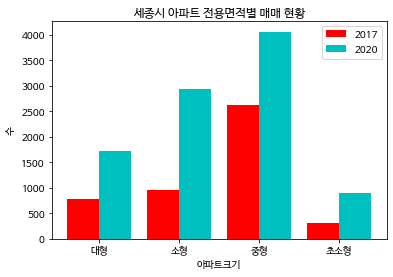

In [ ]:
x_title = list(df222.index)
bar_width = 0.4
d1 = list(df111['count'])
d2 = list(df222['count'])
index = np.arange(len(x_title))

plt.bar(index, d1, color = 'r', align = 'edge', width = bar_width, label = '2017')
plt.bar(index+bar_width, d2, color = 'c', align = 'edge', width = bar_width, label = '2020')

plt.xticks(index + bar_width, x_title)
plt.legend()
plt.xlabel('아파트크기')
plt.ylabel('수')
plt.title('세종시 아파트 전용면적별 매매 현황')
plt.show()

### 세종시 연립다세대 전용면적별_매매 (2017, 2020)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/4.세종시_연립다세대(매매)_실거래가.csv')

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,0,201701,3,세종특별자치시 조치원읍 원리,132,7,고려1동,62.0800,36.31,4700,2,1983,NaN
1,1,201701,13,세종특별자치시 조치원읍 침산리,167,6,용성빌라,64.2300,42.25,6500,2,1991,NaN
2,2,201701,18,세종특별자치시 전의면 관정리,262,6,홍성맨션3차,53.9650,77.15,4300,4,2002,NaN
3,3,201701,26,세종특별자치시 조치원읍 서창리,140,11,삼현빌라,48.5300,37.30,4000,2,1989,NaN
4,4,201702,1,세종특별자치시 조치원읍 신흥리,106,0,주공연립,67.9000,133.43,12800,1,1984,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,202012,28,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,21.6349,6.44,9500,5,2016,NaN
617,617,202012,28,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,21.6349,6.44,9500,5,2016,NaN
618,618,202012,28,세종특별자치시 연서면 월하리,618,1,삼풍,54.0900,35.13,5500,1,1991,NaN
619,619,202012,29,세종특별자치시 부강면 부강리,526,0,(526-0),64.8200,121.64,13400,3,2012,NaN


In [ ]:
# 201701~12  190건임을 확인
df[df['계약년월'] == 201712]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
187,187,201712,11,세종특별자치시 조치원읍 신흥리,106,0,주공연립,55.35,108.78,10700,2,1984,NaN
188,188,201712,13,세종특별자치시 부강면 부강리,1008,1,송정빌라,22.42,19.44,1900,3,2001,NaN
189,189,201712,20,세종특별자치시 연기면 연기리,443,16,보성풀하우스 101동,83.11,68.18,18000,3,2015,NaN
190,190,201712,26,세종특별자치시 금남면 도남리,97,0,금강휴양림마을(프로방스빌),52.30,49.95,24000,1,2015,NaN


In [ ]:
# 2020년 시작지점 362
df[df['계약년월'] == 202001]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
362,362,202001,17,세종특별자치시 조치원읍 죽림리,4,9,동진빌라(나),48.4100,30.33,6900,3,1990,NaN
363,363,202001,23,세종특별자치시 반곡동,4121,1004,더스테이빌딩,44.2708,14.60,17000,5,2018,NaN
364,364,202001,23,세종특별자치시 반곡동,4121,1004,더스테이빌딩,45.4108,14.98,17000,6,2018,NaN
365,365,202001,23,세종특별자치시 반곡동,4121,1004,더스테이빌딩,36.7038,12.11,13000,6,2018,NaN
366,366,202001,29,세종특별자치시 연기면 연기리,443,10,보성풀하우스 102동,83.2000,69.11,15000,1,2014,NaN
367,367,202001,30,세종특별자치시 보람동,743,0,스타힐타워Ⅰ,16.6229,4.95,7600,8,2016,NaN


2017년도 세종시 연립다세대 매매

In [ ]:
df1 = df[:191]

2020년도 세종시 연립다세대 매매

In [ ]:
df2 = df[362:]

In [ ]:
# 데이터 셋 재구성

df1 = df1['전용면적(㎡)']
df2 = df2['전용면적(㎡)']

In [ ]:
# R을 이용한 데이터 처리를 위해 csv로 내보냄

df1.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df3.csv',encoding='utf-8')
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df4.csv',encoding='utf-8')

* 내보낸 df3.csv, df4.csv를 R을 이용하여 전용면적이 40㎡ 이하 일 때 초소형, 40 ~ 60㎡ 소형, 60 ~ 85㎡ 중형, 85㎡ 초과를 대형으로 구분하였다.
* 내보낸 csv파일이 인코딩 문제로 컬럼명을 직접 수정하였음(전용면적(㎡) -> 전용면적)
- 수정된 파일을 df33.csv, df44.csv로 불러와서 아래 작업을 함.


In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df33 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df33.csv', encoding='cp949')
df33['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,0,62.080,중형,1
1,2,1,64.230,중형,1
2,3,2,53.965,소형,1
3,4,3,48.530,소형,1
4,5,4,67.900,중형,1
...,...,...,...,...,...
186,187,186,59.490,소형,1
187,188,187,55.350,소형,1
188,189,188,22.420,초소형,1
189,190,189,83.110,중형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df333 = pd.pivot_table(df33, index = 'size',aggfunc = 'sum')
df333

,Unnamed: 0,X,count,전용면적
size,,,,
대형,122,121,1,106.0300
소형,4719,4669,50,2730.5725
중형,2659,2627,32,2203.9750
초소형,10836,10728,108,2171.5273


In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df44 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df44.csv', encoding='cp949')
df44['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,362,48.4100,소형,1
1,2,363,44.2708,소형,1
2,3,364,45.4108,소형,1
3,4,365,36.7038,초소형,1
4,5,366,83.2000,중형,1
...,...,...,...,...,...
254,255,616,21.6349,초소형,1
255,256,617,21.6349,초소형,1
256,257,618,54.0900,소형,1
257,258,619,64.8200,중형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df444 = pd.pivot_table(df44, index = 'size',aggfunc = 'sum')
df444

,Unnamed: 0,X,count,전용면적
size,,,,
소형,12878,45729,91,4689.2946
중형,6595,23562,47,3349.3250
초소형,14197,57878,121,2733.5905


- 연립다세대의 경우 2020년도에 대형의 거래량이 없어서 시각화에 제한
- 그래프를 그리기 용이하게 처리함

#### 시각화

In [ ]:
# 데이터셋의 빈 부분을 채워 시각화를 용이하게 함

add1 = pd.DataFrame({'Unnamed: 0':0, 'X':0, 'count':0, '전용면적':0.1}, index = ['대형'])
add1

,Unnamed: 0,X,count,전용면적
대형,0,0,0,0.1


In [ ]:
# 대형은 임의로 만들어 진 항목
df444 =  pd.concat([add1,df444])
df444

,Unnamed: 0,X,count,전용면적
대형,0,0,0,0.1000
소형,12878,45729,91,4689.2946
중형,6595,23562,47,3349.3250
초소형,14197,57878,121,2733.5905


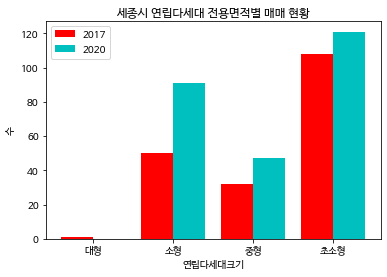

In [ ]:
x_title = list(df444.index)
bar_width = 0.4
d1 = list(df333['count'])
d2 = list(df444['count'])
index = np.arange(len(x_title))

plt.bar(index, d1, color = 'r', align = 'edge', width = bar_width, label = '2017')
plt.bar(index+bar_width, d2, color = 'c', align = 'edge', width = bar_width, label = '2020')

plt.xticks(index + bar_width, x_title)
plt.legend()
plt.xlabel('연립다세대크기')
plt.ylabel('수')
plt.title('세종시 연립다세대 전용면적별 매매 현황')
plt.show()

### 세종시 단독다가구 전용면적별_매매 (2017, 2020)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/5.세종시_단독다가구(매매)_실거래가.csv')

,Unnamed: 0,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
0,0,201701,2,세종특별자치시 전의면 다방리,단독,8m미만,67.32,294.0,2000,1991.0,NaN
1,1,201701,4,세종특별자치시 조치원읍 서창리,단독,8m미만,581.25,415.0,54500,1997.0,NaN
2,2,201701,4,세종특별자치시 조치원읍 죽림리,단독,8m미만,63.89,175.0,16000,1983.0,NaN
3,3,201701,6,세종특별자치시 금남면 용담리,단독,8m미만,95.76,537.0,26000,1977.0,NaN
4,4,201701,6,세종특별자치시 조치원읍 서창리,다가구,8m미만,375.36,222.7,53700,2011.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1139,1139,202012,28,세종특별자치시 전동면 노장리,단독,8m미만,191.34,660.0,16000,1998.0,NaN
1140,1140,202012,29,세종특별자치시 장군면 도계리,단독,8m미만,235.71,950.0,47100,1990.0,NaN
1141,1141,202012,29,세종특별자치시 전동면 미곡리,단독,8m미만,129.96,1482.0,35000,2014.0,NaN
1142,1142,202012,30,세종특별자치시 조치원읍 원리,단독,8m미만,205.05,142.8,30000,1977.0,NaN


In [ ]:
# 201701~12  309건임을 확인
df[df['계약년월'] == 201712]

,Unnamed: 0,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
286,286,201712,1,세종특별자치시 전의면 신흥리,단독,8m미만,70.52,315.0,9546,2014.0,NaN
287,287,201712,1,세종특별자치시 조치원읍 신안리,다가구,8m미만,570.51,340.0,59500,1997.0,NaN
288,288,201712,1,세종특별자치시 조치원읍 죽림리,단독,25m미만,73.92,266.0,39500,1950.0,NaN
289,289,201712,2,세종특별자치시 연기면 수산리,단독,8m미만,127.41,883.0,56900,2001.0,NaN
290,290,201712,2,세종특별자치시 연기면 연기리,단독,8m미만,94.06,385.0,41000,1996.0,NaN
291,291,201712,4,세종특별자치시 조치원읍 서창리,다가구,8m미만,495.96,850.0,45000,2002.0,NaN
292,292,201712,6,세종특별자치시 조치원읍 신안리,다가구,8m미만,610.78,458.0,49500,1996.0,NaN
293,293,201712,7,세종특별자치시 부강면 부강리,단독,8m미만,54.03,155.0,8500,1981.0,NaN
294,294,201712,9,세종특별자치시 금남면 달전리,단독,8m미만,110.20,407.0,26350,2003.0,NaN
295,295,201712,13,세종특별자치시 조치원읍 침산리,단독,12m미만,342.29,177.3,60000,2013.0,NaN


In [ ]:
# 2020년 시작지점 763
df[df['계약년월'] == 202001]

,Unnamed: 0,계약년월,계약일,시군구,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,해제사유발생일
763,763,202001,3,세종특별자치시 장군면 봉안리,단독,8m미만,85.43,547.0,107554,1995.0,NaN
764,764,202001,6,세종특별자치시 소정면 소정리,단독,25m미만,186.93,374.0,8150,1992.0,NaN
765,765,202001,7,세종특별자치시 조치원읍 신흥리,단독,12m미만,80.22,188.0,17000,1975.0,NaN
766,766,202001,13,세종특별자치시 연서면 봉암리,다가구,8m미만,375.64,393.0,56000,2012.0,NaN
767,767,202001,15,세종특별자치시 연서면 성제리,단독,8m미만,89.31,500.0,30000,2003.0,NaN
768,768,202001,15,세종특별자치시 조치원읍 신안리,다가구,8m미만,615.85,339.0,85000,2010.0,NaN
769,769,202001,16,세종특별자치시 장군면 대교리,단독,8m미만,154.49,766.0,33000,2017.0,NaN
770,770,202001,20,세종특별자치시 부강면 부강리,단독,12m미만,84.13,268.0,27500,1940.0,NaN
771,771,202001,20,세종특별자치시 조치원읍 서창리,다가구,8m미만,570.42,331.0,75000,2012.0,NaN
772,772,202001,22,세종특별자치시 부강면 부강리,다가구,12m미만,494.15,248.0,87000,2013.0,NaN


2017년도 세종시 단독다가구 매매

In [ ]:
df1 = df[:310]

2020년도 세종시 단독다가구 매매

In [ ]:
df2 = df[763:]

In [ ]:
# 데이터 셋 재구성

df1 = df1['연면적(㎡)']
df2 = df2['연면적(㎡)']

In [ ]:
# R을 이용한 데이터 처리를 위해 csv로 내보냄

df1.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df7.csv',encoding='utf-8')
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df8.csv',encoding='utf-8')

- 단독 다가구는 전용면적대신 연면적 이용
* 내보낸 df7.csv, df8.csv를 R을 이용하여 전용면적이 40㎡ 이하 일 때 초소형, 40 ~ 60㎡ 소형, 60 ~ 85㎡ 중형, 85㎡ 초과를 대형으로 구분하였다.
* 내보낸 csv파일이 인코딩 문제로 컬럼명을 직접 수정하였음(연면적(㎡) -> 연면적)
- 수정된 파일을 df77.csv, df88.csv로 불러와서 아래 작업을 함.

In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df77 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df77.csv', encoding='cp949')
df77['count'] = 1

,Unnamed: 0,X,연면적,size,count
0,1,0,67.32,중형,1
1,2,1,581.25,대형,1
2,3,2,63.89,중형,1
3,4,3,95.76,대형,1
4,5,4,375.36,대형,1
...,...,...,...,...,...
305,306,305,80.85,중형,1
306,307,306,99.18,대형,1
307,308,307,92.56,대형,1
308,309,308,522.13,대형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df777 = pd.pivot_table(df77, index = 'size',aggfunc = 'sum')
df777

,Unnamed: 0,X,count,연면적
size,,,,
대형,31787,31585,202,63409.56
소형,5491,5456,35,1802.07
중형,10224,10159,65,4705.00
초소형,703,695,8,255.36


In [ ]:
df88 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df88.csv', encoding='cp949')
df88['count'] = 1

,Unnamed: 0,X,연면적,size,count
0,1,763,85.43,대형,1
1,2,764,186.93,대형,1
2,3,765,80.22,중형,1
3,4,766,375.64,대형,1
4,5,767,89.31,대형,1
...,...,...,...,...,...
376,377,1139,191.34,대형,1
377,378,1140,235.71,대형,1
378,379,1141,129.96,대형,1
379,380,1142,205.05,대형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df888 = pd.pivot_table(df88, index = 'size',aggfunc = 'sum')
df888

,Unnamed: 0,X,count,연면적
size,,,,
대형,44254,221038,232,47770.40
소형,7098,35292,37,1962.37
중형,18802,91954,96,7009.14
초소형,2617,14809,16,527.85


#### 시각화

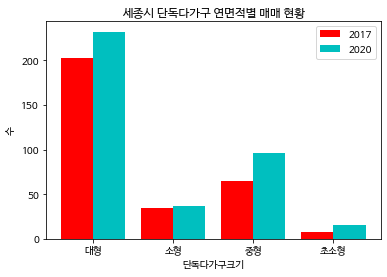

In [ ]:
x_title = list(df777.index)
bar_width = 0.4
d1 = list(df777['count'])
d2 = list(df888['count'])
index = np.arange(len(x_title))

plt.bar(index, d1, color = 'r', align = 'edge', width = bar_width, label = '2017')
plt.bar(index+bar_width, d2, color = 'c', align = 'edge', width = bar_width, label = '2020')

plt.xticks(index + bar_width, x_title)
plt.legend()
plt.xlabel('단독다가구크기')
plt.ylabel('수')
plt.title('세종시 단독다가구 연면적별 매매 현황')
plt.show()

### 세종시 오피스텔 전용면적별_매매 (2017, 2020)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/6.세종시_오피스텔(매매)_실거래가.csv')

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,0,201701,4,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9000,14,2014,NaN
1,1,201701,6,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9500,11,2014,NaN
2,2,201702,5,세종특별자치시 나성동,713,0,세진이너스빌,34.15,13000,8,2013,NaN
3,3,201702,7,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9500,4,2014,NaN
4,4,201702,7,세종특별자치시 어진동,0,0,푸르지오시티,23.74,9000,4,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
340,340,202012,20,세종특별자치시 나성동,756,0,리치먼드시티세종,26.18,16410,6,2020,NaN
341,341,202012,21,세종특별자치시 어진동,0,0,푸르지오시티,24.22,8600,18,2014,NaN
342,342,202012,23,세종특별자치시 나성동,756,0,리치먼드시티세종,26.18,15340,7,2020,20210118.0
343,343,202012,23,세종특별자치시 어진동,0,0,2차푸르지오시티,30.48,11500,9,2014,NaN


In [ ]:
# 201701~12  190건임을 확인
df[df['계약년월'] == 201712]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
46,46,201712,2,세종특별자치시 나성동,0,0,더리치세종의아침,40.97,17000,5,2015,NaN
47,47,201712,6,세종특별자치시 도담동,246,5,세종한신휴시티,27.43,9900,5,2014,NaN


In [ ]:
# 2020년 시작지점 362
df[df['계약년월'] == 202001]

,Unnamed: 0,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
131,131,202001,6,세종특별자치시 어진동,0,0,2차푸르지오시티,21.92,8500,5,2014,NaN
132,132,202001,7,세종특별자치시 어진동,0,0,푸르지오시티,24.22,8050,4,2014,NaN
133,133,202001,15,세종특별자치시 도담동,246,5,세종한신휴시티,24.03,9400,3,2014,NaN
134,134,202001,17,세종특별자치시 도담동,246,5,세종한신휴시티,24.03,8850,8,2014,NaN
135,135,202001,27,세종특별자치시 부강면 부강리,127,1,주건축물제1동,83.01,19000,2,2019,NaN
136,136,202001,28,세종특별자치시 어진동,0,0,2차푸르지오시티,21.92,7000,8,2014,NaN
137,137,202001,30,세종특별자치시 도담동,246,5,세종한신휴시티,27.43,8950,4,2014,NaN


2017년도 세종시 오피스텔 매매

In [ ]:
df1 = df[:48]

2020년도 세종시 오피스텔 매매

In [ ]:
df2 = df[131:]

In [ ]:
# 데이터 셋 재구성

df1 = df1['전용면적(㎡)']
df2 = df2['전용면적(㎡)']

In [ ]:
# R을 이용한 데이터 처리를 위해 csv로 내보냄

df1.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df5.csv',encoding='utf-8')
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df6.csv',encoding='utf-8')

- 오피스텔은 기존의 초소,소,중,대의 기준으로 구분하기는 무리가 있어 새로운 기준을 정함
* 내보낸 df5.csv, df6.csv를 R을 이용하여 전용면적이 초소형 (20㎡ 이하), 소형  (20 ~ 40㎡), 중형 (40 ~ 60㎡), 대형 (60㎡ 초과) 구분하였다.
* 내보낸 csv파일이 인코딩 문제로 컬럼명을 직접 수정하였음(전용면적(㎡) -> 전용면적)
- 수정된 파일을 df55.csv, df66.csv로 불러와서 아래 작업을 함.

In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df55 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df55.csv', encoding='cp949')
df55['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,0,23.74,소형,1
1,2,1,23.74,소형,1
2,3,2,34.15,소형,1
3,4,3,23.74,소형,1
4,5,4,23.74,소형,1
5,6,5,22.42,소형,1
6,7,6,29.47,소형,1
7,8,7,23.74,소형,1
8,9,8,23.24,소형,1
9,10,9,21.92,소형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df555 = pd.pivot_table(df55, index = 'size',aggfunc = 'sum')
df555

,Unnamed: 0,X,count,전용면적
size,,,,
소형,1083,1038,45,1109.53
중형,93,90,3,145.01


In [ ]:
# 임의로 count 항목을 만들어 1을 값으로 줌

df66 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/df66.csv', encoding='cp949')
df66['count'] = 1

,Unnamed: 0,X,전용면적,size,count
0,1,131,21.92,소형,1
1,2,132,24.22,소형,1
2,3,133,24.03,소형,1
3,4,134,24.03,소형,1
4,5,135,83.01,대형,1
...,...,...,...,...,...
209,210,340,26.18,소형,1
210,211,341,24.22,소형,1
211,212,342,26.18,소형,1
212,213,343,30.48,소형,1


In [ ]:
# pivot_table을 이용해 size별 개수를 구함

df666 = pd.pivot_table(df66, index = 'size',aggfunc = 'sum')
df666

,Unnamed: 0,X,count,전용면적
size,,,,
대형,5,135,1,83.01
소형,22151,48931,206,5091.18
중형,849,1759,7,322.85


- 초소형 오피스텔은 2017, 2020년도의 매매자료에서 찾을 수 없음
- 대형 오피스텔은 2017년도에 매매자료에서 찾을 수 없음
- 그래프를 그리기 용이하게 임의 처리함

#### 시각화

In [ ]:
# 데이터셋의 빈 부분을 채워 시각화를 용이하게 함

add1 = pd.DataFrame({'Unnamed: 0':0, 'X':0, 'count':0, '전용면적':0.1}, index = ['대형'])
add1

,Unnamed: 0,X,count,전용면적
대형,0,0,0,0.1


In [ ]:
# add1과 df555를 합침(대형은 임의로 만들어 진 항목)

df555 =  pd.concat([add1,df555])
df555

,Unnamed: 0,X,count,전용면적
대형,0,0,0,0.10
소형,1083,1038,45,1109.53
중형,93,90,3,145.01


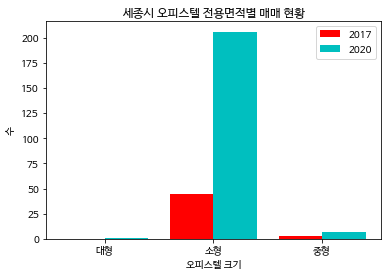

In [ ]:
x_title = list(df555.index)
bar_width = 0.4
d1 = list(df555['count'])
d2 = list(df666['count'])
index = np.arange(len(x_title))

plt.bar(index, d1, color = 'r', align = 'edge', width = bar_width, label = '2017')
plt.bar(index+bar_width, d2, color = 'c', align = 'edge', width = bar_width, label = '2020')

plt.xticks(index + bar_width, x_title)
plt.legend()
plt.xlabel('오피스텔 크기')
plt.ylabel('수')
plt.title('세종시 오피스텔 전용면적별 매매 현황')
plt.show()

### 세종시 인구현황도 2020년도의 인구 현황을 알아보자

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/세종시/data/22.세종시_연령별_인구현황.csv')
df = df[1:]

In [ ]:
df = df.set_index(df['읍면동'])

1~12월 세종시 인구수

In [ ]:
df['202001_세종시인구수'] = df['202001_남자(연령구간인구수)'] + df['202001_여자(연령구간인구수)']
df['202002_세종시인구수'] = df['202002_남자(연령구간인구수)'] + df['202002_여자(연령구간인구수)']
df['202003_세종시인구수'] = df['202003_남자(연령구간인구수)'] + df['202003_여자(연령구간인구수)']
df['202004_세종시인구수'] = df['202004_남자(연령구간인구수)'] + df['202004_여자(연령구간인구수)']
df['202005_세종시인구수'] = df['202005_남자(연령구간인구수)'] + df['202005_여자(연령구간인구수)']
df['202006_세종시인구수'] = df['202006_남자(연령구간인구수)'] + df['202006_여자(연령구간인구수)']
df['202007_세종시인구수'] = df['202007_남자(연령구간인구수)'] + df['202007_여자(연령구간인구수)']
df['202008_세종시인구수'] = df['202008_남자(연령구간인구수)'] + df['202008_여자(연령구간인구수)']
df['202009_세종시인구수'] = df['202009_남자(연령구간인구수)'] + df['202009_여자(연령구간인구수)']
df['202010_세종시인구수'] = df['202010_남자(연령구간인구수)'] + df['202010_여자(연령구간인구수)']
df['202011_세종시인구수'] = df['202011_남자(연령구간인구수)'] + df['202011_여자(연령구간인구수)']
df['202012_세종시인구수'] = df['202012_남자(연령구간인구수)'] + df['202012_여자(연령구간인구수)']

In [ ]:
df['202001_세종시인구수']

읍면동
조치원읍    42888
연기면      2528
연동면      3139
부강면      6224
금남면      8623
장군면      6203
연서면      7466
전의면      5741
전동면      3674
소정면      2502
한솔동     19353
새롬동     53817
도담동     32077
아름동     23633
종촌동     29811
고운동     33373
소담동     30207
보람동     19317
대평동     10620
다정동         0
Name: 202001_세종시인구수, dtype: int64

In [ ]:
df['202002_세종시인구수'] 

읍면동
조치원읍    42896
연기면      2510
연동면      3144
부강면      6185
금남면      8627
장군면      6226
연서면      7451
전의면      5714
전동면      3654
소정면      2476
한솔동     19434
새롬동     54282
도담동     32160
아름동     23755
종촌동     29919
고운동     33530
소담동     30623
보람동     19457
대평동     10608
다정동         0
Name: 202002_세종시인구수, dtype: int64